In [1]:
import pandas as pd
import numpy as np
import math

np.random.seed(0)

# graphics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d    # <- 明示的には使わないが、projection='3d'とするためにインポートする必要あり
%matplotlib notebook

# parameters of ring1
r1 = 5.
sigma1 = 0.5
n1 = 100

# parameters of ring1
r2 = 5.
sigma2 = .5
n2 = 100

In [2]:
col = ['x', 'y', 'z']

# ring1
ring_mu1 = [[r1*math.cos(2*i*math.pi/n1), r1*math.sin(2*i*math.pi/n1), 0] for i in range(n1)]
noise1 = np.random.normal(0,sigma1,(n1,3))
df_ring1 = pd.DataFrame(ring_mu1 + noise1, columns = col)
df_ring1['label'] = 1

# ring2
ring_mu2 = [[0, r2 + r2*math.cos(2*i*math.pi/n2), r2*math.sin(2*i*math.pi/n2)] for i in range(n2)]
noise2 = np.random.normal(0,sigma2,(n2,3))
df_ring2 = pd.DataFrame(ring_mu2 + noise2, columns = col)
df_ring2['label'] = 2

df = pd.concat([df_ring1, df_ring2])
df.describe()

,x,y,z,label
count,200.000000,200.000000,200.000000,200.000000
mean,0.015999,2.486706,-0.085131,1.500000
std,2.540031,4.317793,2.511533,0.501255
min,-5.403353,-5.438546,-6.109936,1.000000
25%,-0.789972,-0.348796,-0.779546,1.000000
50%,-0.019709,2.483673,-0.055346,1.500000
75%,0.678645,5.429896,0.939093,2.000000
max,6.110580,10.829065,5.257425,2.000000


<IPython.core.display.Javascript object>


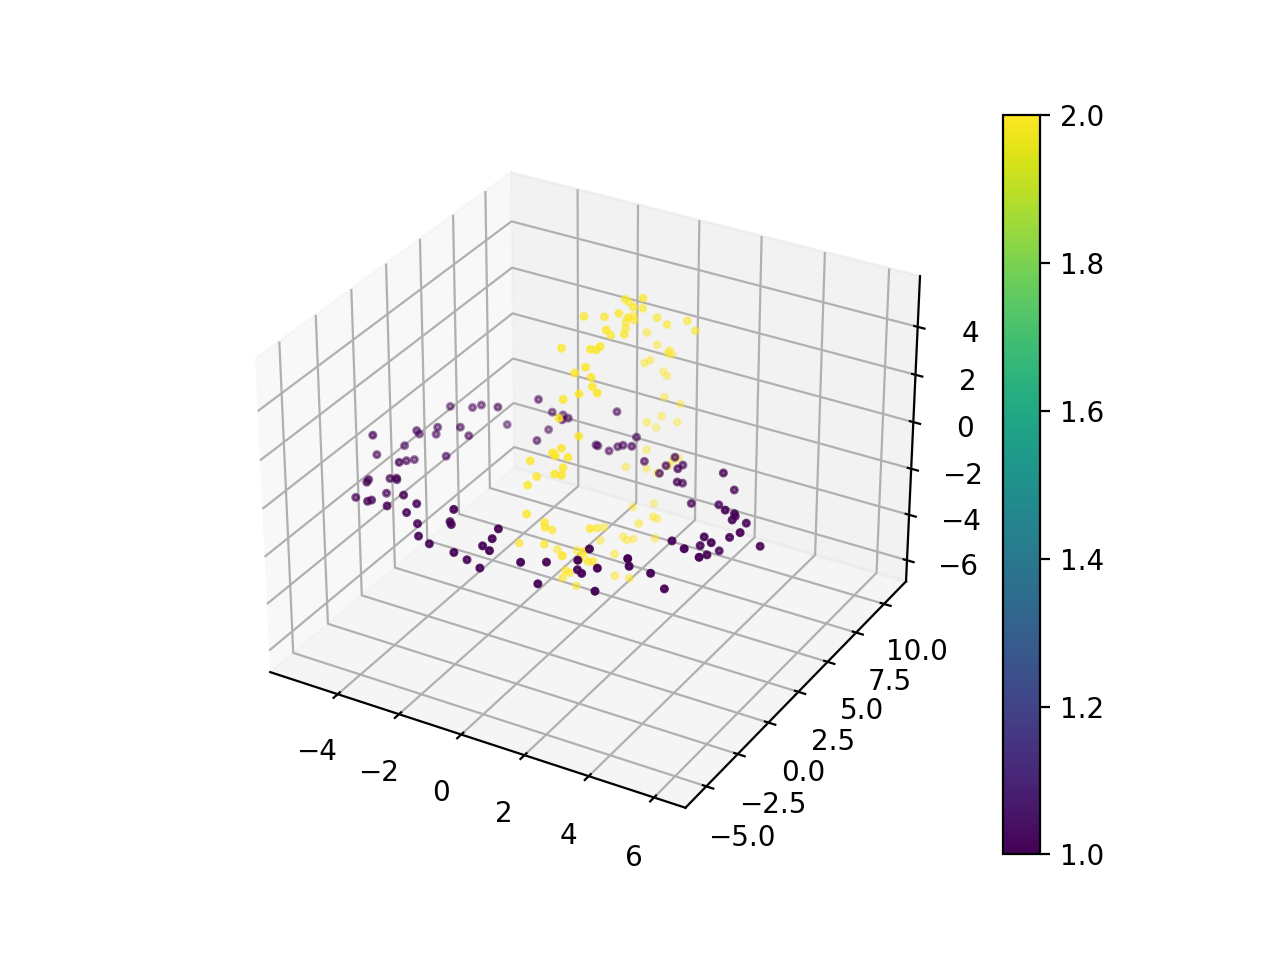

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df.x,df.y,df.z,
                s=5,                    # マーカーのサイズ
                c=df.label,             # 色分けに使う数値（任意の数値を指定可）
                cmap=plt.cm.viridis)    # 色のパターン
plt.colorbar(sc)         # カラーバーを表示（省略可）

In [4]:
df.to_csv('rings_data.csv')